In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabeties.csv")
df.head()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Goal -: We need to create a ML model, which has the ability to Predict the Patient as Positive if they are actually Positive.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   glocose    768 non-null    int64  
 2   bp         768 non-null    int64  
 3   skin       768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   predigree  768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe()

,pregnant,glocose,bp,skin,insulin,bmi,predigree,age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#sns.pairplot(df)

In [6]:
#sns.pairplot(data=df, hue="target")

In [7]:
df.target.value_counts()

0    500
1    268
Name: target, dtype: int64

In [8]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)
ypred = logreg.predict(xtest)

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")
#In confusion matrix, 36 FN and 14 FP,
# if u see recall value,modelis predicting non-diabetic 0.90 times,and for diabetic only, 0.58 times.
# i.e. out of 100 diabetic people, 58 are correctly predicted and rest are missed.Recall value is not great.
# f1-score for diabetic people is 66.So we can change the threshold.

Accuracy : 0.7835497835497836
ROC : 0.740290088638195
[[132  14]
 [ 36  49]]

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       146
           1       0.78      0.58      0.66        85

    accuracy                           0.78       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



In [9]:
# but before changing threshold, we will check bias-variance,so that we get a clear picture if we need to 
# apply hyperparameter tuning as well.
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")
# low bias ,low varince..Soour model is good..its just performing bad when it comes to +ve values.

Training Accuracy - : 0.7728119180633147
Testing Accuracy -: 0.7835497835497836


In [10]:
print(f"Actual Values     : {ytest[:25].values}") # to convert df into numpy array
print(f"Predicted Values  : {ypred[:25]}") # it'salready in 1 D array format

Actual Values     : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted Values  : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0]


In [11]:
print(f"Actual Values     : {ytest[25:51].values}")
print(f"Predicted Values  : {ypred[25:51]}")

Actual Values     : [0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0]
Predicted Values  : [0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0]


In [12]:
logreg.predict_proba(xtest) # it gives prob of observation, that it will go under 0 class or class 1

array([[0.58040167, 0.41959833],
       [0.69594776, 0.30405224],
       [0.85395001, 0.14604999],
       [0.94499839, 0.05500161],
       [0.79048285, 0.20951715],
       [0.72197338, 0.27802662],
       [0.64280942, 0.35719058],
       [0.89586984, 0.10413016],
       [0.83496673, 0.16503327],
       [0.7887994 , 0.2112006 ],
       [0.56950834, 0.43049166],
       [0.92486115, 0.07513885],
       [0.01884581, 0.98115419],
       [0.27328702, 0.72671298],
       [0.97528382, 0.02471618],
       [0.28338038, 0.71661962],
       [0.7640036 , 0.2359964 ],
       [0.69651885, 0.30348115],
       [0.87011997, 0.12988003],
       [0.84402692, 0.15597308],
       [0.61772002, 0.38227998],
       [0.8668078 , 0.1331922 ],
       [0.04823539, 0.95176461],
       [0.73908631, 0.26091369],
       [0.92726287, 0.07273713],
       [0.59294088, 0.40705912],
       [0.79790822, 0.20209178],
       [0.27468458, 0.72531542],
       [0.91827899, 0.08172101],
       [0.54150071, 0.45849929],
       [0.

In [13]:
ypredprob = logreg.predict_proba(xtest)[:, 1] # now, we want to make changes for 1 value. All rows of 1st col
# we want to change the prediction threshold from 0.5 to 0.3

In [14]:
ypredprob #probability of a patient for being diabetic i.e for class 1

array([0.41959833, 0.30405224, 0.14604999, 0.05500161, 0.20951715,
       0.27802662, 0.35719058, 0.10413016, 0.16503327, 0.2112006 ,
       0.43049166, 0.07513885, 0.98115419, 0.72671298, 0.02471618,
       0.71661962, 0.2359964 , 0.30348115, 0.12988003, 0.15597308,
       0.38227998, 0.1331922 , 0.95176461, 0.26091369, 0.07273713,
       0.40705912, 0.20209178, 0.72531542, 0.08172101, 0.45849929,
       0.40717803, 0.32551704, 0.05376148, 0.70135858, 0.12923849,
       0.66577673, 0.08926178, 0.1808939 , 0.10293465, 0.62329941,
       0.21034335, 0.08630537, 0.0388271 , 0.28131628, 0.07063734,
       0.02336229, 0.75627216, 0.81145034, 0.07646649, 0.14229497,
       0.00859796, 0.17865342, 0.8345566 , 0.05093114, 0.74527334,
       0.10061903, 0.61654377, 0.29828275, 0.56269506, 0.17070969,
       0.61625621, 0.01318283, 0.71596152, 0.22045548, 0.37406764,
       0.11151108, 0.01522898, 0.35658945, 0.70100727, 0.60282389,
       0.8811021 , 0.75329602, 0.58199782, 0.01784831, 0.68146

In [15]:

from sklearn.preprocessing import binarize

In [16]:
#ypredprop is a 1 d array and we need to pass it into 2 d, seperate threshold of 0.3 
ypred = binarize([ypredprob], threshold=0.3)[0] # since we have passed 2 d array,it is giving us 2D,therefore
# passing index 0, to get 1D


In [17]:
print(f"Actual Values     : {ytest[:25].values}")
print(f"Predicted Values  : {ypred[:25].astype(int)}") # typecasting because currently values are in float.

Actual Values     : [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0]
Predicted Values  : [1 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0]


In [18]:
ac = accuracy_score(ytest, ypred)
ra = roc_auc_score(ytest, ypred)
cm = confusion_matrix(ytest, ypred)
cr = classification_report(ytest, ypred)

print(f"Accuracy : {ac}\nROC : {ra}\n{cm}\n\n{cr}")
# type2 error decreased from 36 to 17,80% ofthe timeif patient is +ve,model will say it +ve.

Accuracy : 0.7705627705627706
ROC : 0.7767123287671234
[[110  36]
 [ 17  68]]

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       146
           1       0.65      0.80      0.72        85

    accuracy                           0.77       231
   macro avg       0.76      0.78      0.76       231
weighted avg       0.79      0.77      0.77       231



In [19]:
train = logreg.score(xtrain, ytrain)
test = logreg.score(xtest, ytest)

print(f"Training Accuracy - : {train}\nTesting Accuracy -: {test}")

Training Accuracy - : 0.7728119180633147
Testing Accuracy -: 0.7835497835497836


In [20]:
from sklearn.metrics import roc_curve

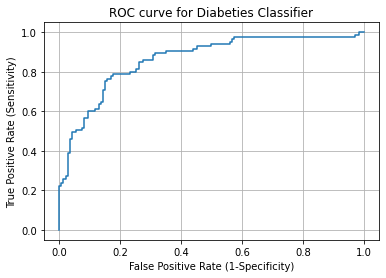

In [21]:
fpr, tpr, thres = roc_curve(ytest, ypredprob)
plt.plot(fpr, tpr)

plt.title("ROC curve for Diabeties Classifier")
plt.xlabel("False Positive Rate (1-Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid()
plt.show()           